## ML-1 Hierarchical Clustering: Agglomerative Hierarchical Clustering (AHC)

## Import Library

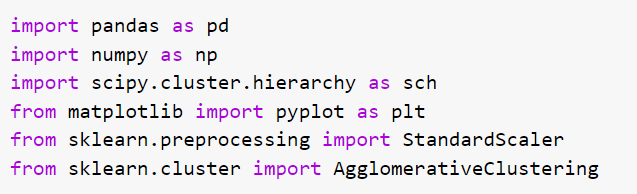

In [ ]:
# Tulis code di sini
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

## Load Dataset

Download dataset [di sini](https://drive.google.com/file/d/1kQhSkVx2BYYRHeGZtjjfgZTOMSf9YjhY/view?usp=sharing)

Pada hands-on kali ini, kita akan membuat customer segmentation dari dataset customer sebuah toko kredit di Mall.

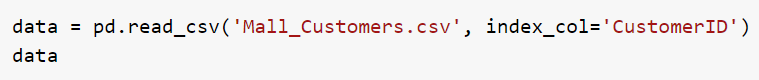

In [ ]:
# Tulis code di sini
data = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
data

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
209,Female,35,1207,79
210,Female,45,126,182
211,Male,32,126,174


Memeriksa kelengkapan dataset.

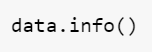

In [ ]:
# Tulis code di sini
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 1 to 213
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         240 non-null    object
 1   Age            240 non-null    int64 
 2   AnnualIncome   240 non-null    int64 
 3   SpendingScore  240 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.4+ KB


Kita hanya memilih dua variable saja, yakni **AnnualIncome** dan SpendingScore.

> Note: Jika kita memilih variable Gender, maka kita perlu melakukan preprocessing terlebih dahulu.

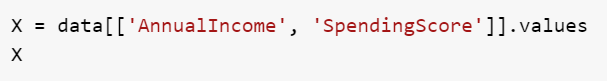

In [ ]:
# Tulis code di sini
X = data[['AnnualIncome', 'SpendingScore']].values
X

array([[  15,   39],
       [  15,   81],
       [  16,    6],
       [  16,   77],
       [  17,   40],
       [  17,   76],
       [  18,    6],
       [  18,   94],
       [  19,    3],
       [  19,   72],
       [  19,   14],
       [  19,   99],
       [  20,   15],
       [  20,   77],
       [  20,   13],
       [  20,   79],
       [  21,   35],
       [  21,   66],
       [  23,   29],
       [  23,   98],
       [  24,   35],
       [  24,   73],
       [  25,    5],
       [  25,   73],
       [  28,   14],
       [  28,   82],
       [  28,   32],
       [  28,   61],
       [  29,   31],
       [  29,   87],
       [  30,    4],
       [  30,   73],
       [  33,    4],
       [  33,   92],
       [  33,   14],
       [  33,   81],
       [  34,   17],
       [  34,   73],
       [  37,   26],
       [  37,   75],
       [  38,   35],
       [  38,   92],
       [  39,   36],
       [  39,   61],
       [  39,   28],
       [  39,   65],
       [  40,   55],
       [  40,

Karena standar besar/kecil di kedua variabel berbeda, maka kita perlu melakukan standarisasi terlebih dahulu menggunakan `StandardScaler`.

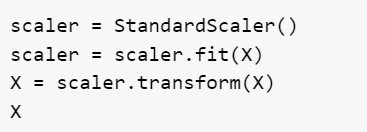

In [ ]:
# Tulis code di sini
scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)
X

array([[-4.31393298e-01, -4.21372977e-01],
       [-4.31393298e-01,  9.16824758e-01],
       [-4.24485019e-01, -1.47281405e+00],
       [-4.24485019e-01,  7.89377354e-01],
       [-4.17576739e-01, -3.89511126e-01],
       [-4.17576739e-01,  7.57515504e-01],
       [-4.10668459e-01, -1.47281405e+00],
       [-4.10668459e-01,  1.33102882e+00],
       [-4.03760179e-01, -1.56839961e+00],
       [-4.03760179e-01,  6.30068100e-01],
       [-4.03760179e-01, -1.21791925e+00],
       [-4.03760179e-01,  1.49033807e+00],
       [-3.96851899e-01, -1.18605740e+00],
       [-3.96851899e-01,  7.89377354e-01],
       [-3.96851899e-01, -1.24978110e+00],
       [-3.96851899e-01,  8.53101056e-01],
       [-3.89943619e-01, -5.48820381e-01],
       [-3.89943619e-01,  4.38896995e-01],
       [-3.76127059e-01, -7.39991486e-01],
       [-3.76127059e-01,  1.45847622e+00],
       [-3.69218779e-01, -5.48820381e-01],
       [-3.69218779e-01,  6.61929951e-01],
       [-3.62310499e-01, -1.50467591e+00],
       [-3.

---

## Membentuk Dendogram



Pilih metode complete linkage!

**FYI**, metode complete linkage bisa diubah dengan:
- single
- average

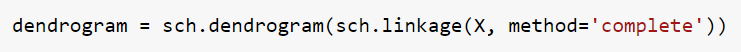

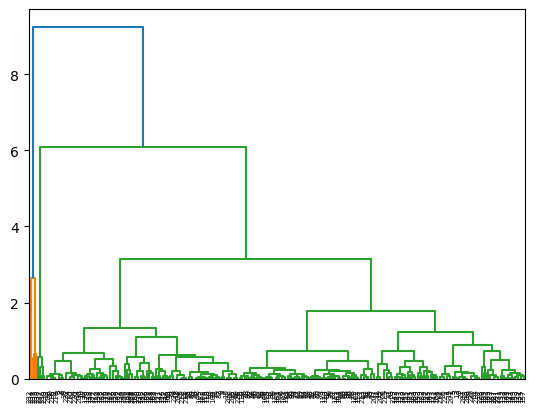

In [ ]:
# Tulis code di sini
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

### Terlihat bahwa garis cluster terpanjang berada dijumlah cluster 2, 3, 4, atau 5.

---

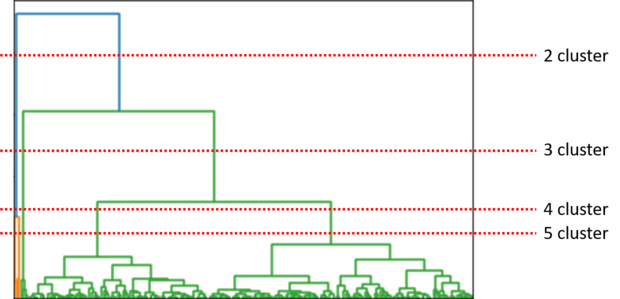

## Modeling

Kita akan coba membuat model menggunakan algoritma Agglomerative Hierarchical Clustering (AHC) dengan:
- 4 cluster
- persamaan jarak menggunakan Euclidean Distance
- menggunakan metode complete linkage


Baca dokumentasi library AHC [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).

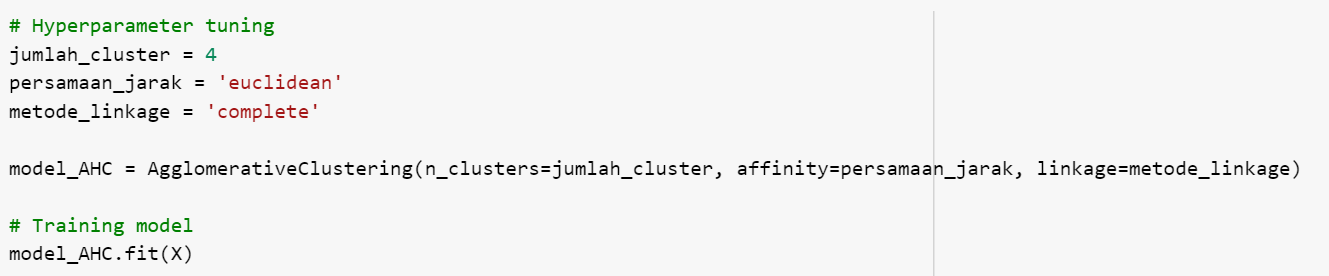

In [ ]:
# Tulis code di sini
jumlah_cluster = 4
persamaan_jarak = 'euclidean'
metode_linkage = 'complete'

model_AHC = AgglomerativeClustering(n_clusters=jumlah_cluster, affinity=persamaan_jarak, linkage=metode_linkage)

model_AHC.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

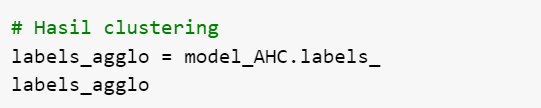

In [ ]:
# Tulis code di sini
labels_agglo = model_AHC.labels_
labels_agglo

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1,
       1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 0, 0, 0, 2, 2, 2, 2])

## Visualisasi Hasil Clustering

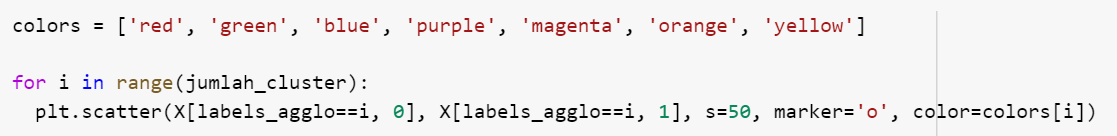

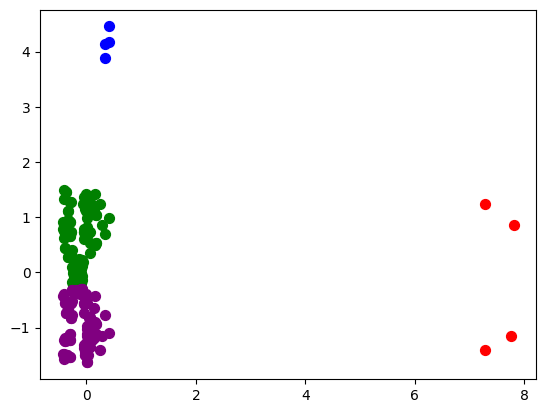

In [ ]:
# Tulis code di sini
colors = ['red', 'green', 'blue', 'purple', 'magenta', 'orange', 'yellow']

for i in range(jumlah_cluster):
  plt.scatter(X[labels_agglo==i, 0], X[labels_agglo==i, 1], s=50, marker='o', color=colors[i])

Kita bisa lihat hasil clusteringnya sudah bagus, terlihat antar cluster cukup terpisah (tidak ada misalnya anggota cluster warna biru berada di tengah2 warna hijau).

Artinya kita bisa menggunakan hasil clustering ini.

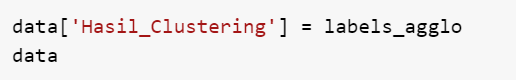

In [ ]:
# Tulis code di sini
data['Hasil_Clustering']= labels_agglo
data

,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,1
3,Female,20,16,6,3
4,Female,23,16,77,1
5,Female,31,17,40,3
...,...,...,...,...,...
209,Female,35,1207,79,0
210,Female,45,126,182,2
211,Male,32,126,174,2


## Kesimpulan

**Contoh**:

Mencari rata-rata tiap cluster untuk menarik kesimpulan.

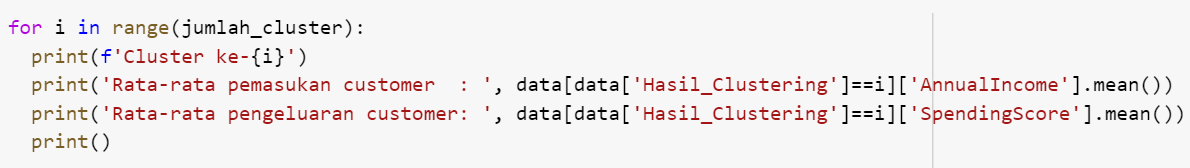

In [ ]:
# Tulis code di sini
for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer : ', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer : ', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())
  print()

Cluster ke-0
Rata-rata pemasukan customer :  1167.0
Rata-rata pengeluaran customer :  48.5

Cluster ke-1
Rata-rata pemasukan customer :  57.268115942028984
Rata-rata pengeluaran customer :  67.94927536231884

Cluster ke-2
Rata-rata pemasukan customer :  131.5
Rata-rata pengeluaran customer :  182.75

Cluster ke-3
Rata-rata pemasukan customer :  58.40425531914894
Rata-rata pengeluaran customer :  23.74468085106383



Bisa kita simpulkan bahwa :    
- Cluster 0 adalah kelompok customer sangat kaya dan sangat hemat (pengeluarannya sangat kecil)
- Cluster 1 adalah kelompok customer menengah ke bawah dan boros (pengeluaran lebih besar dari pemasukan)
- Cluster 3 adalah kelompok customer menengah ke atas dan boros (pengeluaran lebih besar dari pemasukan)
- Cluster 1 adalah kelompok customer menengah ke bawah dan hemat (pengeluaran lebih kecil dari pemasukan)

---

**OPEN DISCUSSION**

Jika kamu adalah pemilik toko kredit dan akan menawarkan kredit mobil, cluster manakah yang menurutmu tepat?



# Exercise (Latihan)

Boleh pilih salah satu activity atau lakukan keduanya.

## Activity 1



1. Coba kombinasi tuning hyperparameter AHC lainnya:
  - jumlah_cluster = 2, 3, 4, 5
  - persamaan_jarak = euclidean, manhattan
  - metode_linkage = single, complete, average

2. Tentukan kombinasi tuning hyperparameter terbaik (selain tuning hyperparameter pada hands-on ini)!

3. Buat kesimpulan clustering menggunakan hyperparameter terbaik!

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


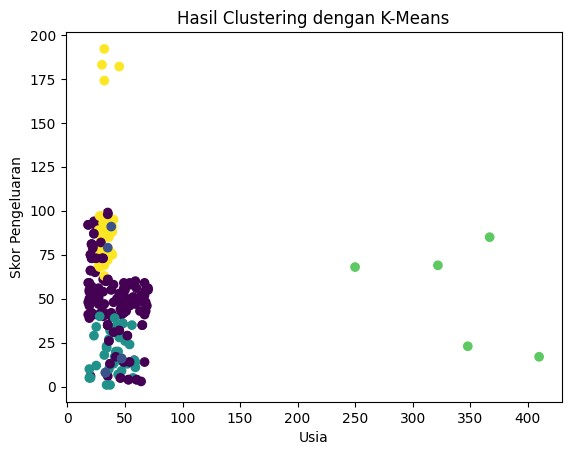

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data
data = pd.read_csv('Mall_Customers.csv')

# Memilih fitur yang akan digunakan
X = data[['Age', 'AnnualIncome', 'SpendingScore']]

# Menentukan jumlah cluster (misalnya, 5)
num_clusters = 5

# Melakukan K-Means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Menambahkan label cluster ke dalam data
data['Cluster'] = kmeans.labels_

# Visualisasi hasil clustering
plt.scatter(data['Age'], data['SpendingScore'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Usia')
plt.ylabel('Skor Pengeluaran')
plt.title('Hasil Clustering dengan K-Means')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd

# Membaca data
data = pd.read_csv('Mall_Customers.csv')

# Memilih fitur yang akan digunakan
X = data[['Age', 'AnnualIncome', 'SpendingScore']]

# Mengatur kombinasi hyperparameter yang akan diuji
num_clusters = [2, 3, 4, 5]
distance_metrics = ['euclidean', 'manhattan']
linkage_methods = ['single', 'complete', 'average']

best_score = -1
best_params = {}

# Mencoba semua kombinasi hyperparameter
for n_clusters in num_clusters:
    for distance_metric in distance_metrics:
        for linkage_method in linkage_methods:
            # Melakukan Agglomerative Hierarchical Clustering
            clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity=distance_metric, linkage=linkage_method)
            clustering.fit(X)
            # Menghitung nilai silhouette score
            silhouette_avg = silhouette_score(X, clustering.labels_)
            # Memeriksa apakah nilai silhouette score lebih baik dari yang sebelumnya
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'num_clusters': n_clusters, 'distance_metric': distance_metric, 'linkage_method': linkage_method}

print("Kombinasi tuning hyperparameter terbaik:")
print(best_params)
print("Nilai Silhouette Score terbaik:", best_score)

Kombinasi tuning hyperparameter terbaik:
{'num_clusters': 2, 'distance_metric': 'euclidean', 'linkage_method': 'single'}
Nilai Silhouette Score terbaik: 0.9403779673399484


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

## Activity 2


1. Buat kelompok
2. Carilah dataset untuk kasus clustering di sekitarmu atau di internet
3. Lakukan clustering menggunakan algortima AHC (ikuti step pada hands-on ini)
4. Buat kesimpulan clustering
5. Kumpulkan ke HC

In [1]:
# Tulis code di sini
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [4]:
data = pd.read_csv('onlinefoods.csv', index_col='Gender')
data

,Age,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
Gender,,,,,,,,,,,,
Female,20,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
Female,24,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
Male,22,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
Female,22,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
Male,22,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
Female,23,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
Female,23,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
Female,22,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388 entries, Female to Male
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Marital Status              388 non-null    object 
 2   Occupation                  388 non-null    object 
 3   Monthly Income              388 non-null    object 
 4   Educational Qualifications  388 non-null    object 
 5   Family size                 388 non-null    int64  
 6   latitude                    388 non-null    float64
 7   longitude                   388 non-null    float64
 8   Pin code                    388 non-null    int64  
 9   Output                      388 non-null    object 
 10  Feedback                    388 non-null    object 
 11  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 39.4+ KB


In [13]:
X = data[['latitude', 'longitude']].values
X

array([[12.9766, 77.5993],
       [12.977 , 77.5773],
       [12.9551, 77.6593],
       [12.9473, 77.5616],
       [12.985 , 77.5533],
       [12.9299, 77.6848],
       [12.977 , 77.5773],
       [12.9828, 77.6131],
       [12.9766, 77.5993],
       [12.9854, 77.7081],
       [12.985 , 77.5533],
       [12.977 , 77.5773],
       [12.8988, 77.5764],
       [12.977 , 77.5773],
       [12.9438, 77.5738],
       [12.8893, 77.6399],
       [12.9783, 77.6408],
       [12.982 , 77.6256],
       [12.8988, 77.5764],
       [12.9783, 77.6408],
       [12.977 , 77.5773],
       [13.0298, 77.6047],
       [12.9983, 77.6409],
       [12.9925, 77.5633],
       [12.9306, 77.5434],
       [12.982 , 77.6256],
       [12.9353, 77.5585],
       [12.9155, 77.5135],
       [12.9854, 77.7081],
       [13.0019, 77.5713],
       [12.9698, 77.75  ],
       [12.9783, 77.6408],
       [12.9261, 77.6221],
       [12.985 , 77.5533],
       [12.9119, 77.6446],
       [12.9306, 77.5434],
       [12.977 , 77.5773],
 

In [14]:
scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)
X

array([[ 0.10222413, -0.01675911],
       [ 0.11122668, -0.44571189],
       [-0.38166266,  1.15311211],
       [-0.55721229, -0.75182819],
       [ 0.29127758, -0.91366037],
       [-0.948823  ,  1.65030737],
       [ 0.11122668, -0.44571189],
       [ 0.24176358,  0.25231127],
       [ 0.10222413, -0.01675911],
       [ 0.30028012,  2.10460736],
       [ 0.29127758, -0.91366037],
       [ 0.11122668, -0.44571189],
       [-1.64877087, -0.46325996],
       [ 0.11122668, -0.44571189],
       [-0.63598456, -0.51395438],
       [-1.86258131,  0.77485375],
       [ 0.14048495,  0.79240182],
       [ 0.22375849,  0.49603444],
       [-1.64877087, -0.46325996],
       [ 0.14048495,  0.79240182],
       [ 0.11122668, -0.44571189],
       [ 1.29956261,  0.0885293 ],
       [ 0.5906122 ,  0.7943516 ],
       [ 0.46007529, -0.71868184],
       [-0.93306854, -1.10668913],
       [ 0.22375849,  0.49603444],
       [-0.82728864, -0.81227154],
       [-1.27291462, -1.68967495],
       [ 0.30028012,

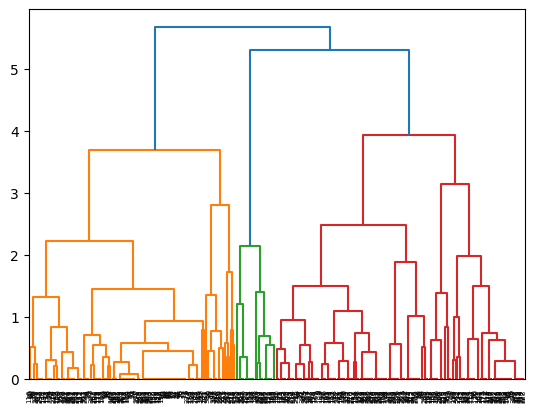

In [15]:
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

In [16]:
jumlah_cluster = 4
persamaan_jarak = 'euclidean'
metode_linkage = 'complete'

model_AHC = AgglomerativeClustering(n_clusters=jumlah_cluster, affinity=persamaan_jarak, linkage=metode_linkage)

model_AHC.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [17]:
labels_agglo = model_AHC.labels_
labels_agglo

array([3, 0, 1, 0, 0, 3, 0, 3, 3, 1, 0, 0, 0, 0, 0, 3, 1, 3, 0, 1, 0, 1,
       1, 0, 0, 3, 0, 0, 1, 0, 1, 1, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0,
       0, 3, 0, 0, 3, 0, 1, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0,
       3, 2, 2, 0, 0, 0, 3, 3, 0, 2, 3, 0, 0, 3, 0, 0, 3, 0, 0, 1, 3, 0,
       0, 0, 0, 1, 0, 0, 3, 0, 1, 1, 3, 0, 0, 3, 1, 0, 3, 1, 1, 3, 1, 3,
       0, 3, 0, 1, 0, 1, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 2, 0, 0,
       0, 0, 3, 1, 1, 1, 1, 3, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 2, 3, 3,
       3, 2, 0, 0, 0, 3, 3, 3, 1, 0, 0, 2, 2, 3, 2, 2, 2, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 0, 3, 3, 3, 3, 3, 0, 1, 1, 3, 1, 0, 1, 3, 3, 1, 3, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 0, 0, 0, 2, 0, 3, 3, 3, 3, 3,
       3, 0, 2, 2, 1, 1, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 3, 3, 1, 1, 1, 0, 0, 3, 3, 2, 2, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 0, 1,

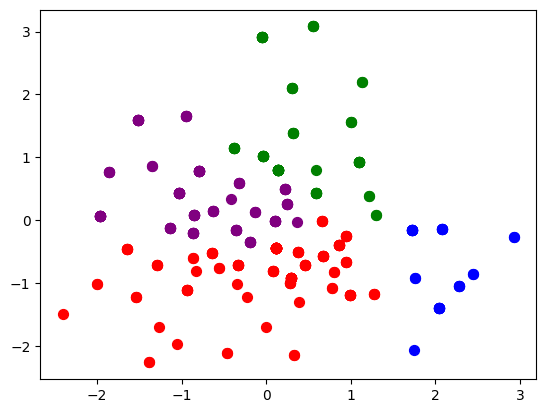

In [18]:
colors = ['red', 'green', 'blue', 'purple', 'magenta', 'orange', 'yellow']

for i in range(jumlah_cluster):
  plt.scatter(X[labels_agglo==i, 0], X[labels_agglo==i, 1], s=50, marker='o', color=colors[i])

In [19]:
data['Hasil_Clustering']= labels_agglo
data

,Age,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12,Hasil_Clustering
Gender,,,,,,,,,,,,,
Female,20,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes,3
Female,24,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes,0
Male,22,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes,1
Female,22,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes,0
Male,22,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Female,23,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes,3
Female,23,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes,1
Female,22,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes,0


In [22]:
for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan : ', data[data['Hasil_Clustering']==i]['latitude'].mean())
  print('Rata-rata pengeluaran : ', data[data['Hasil_Clustering']==i]['longitude'].mean())
  print()

Cluster ke-0
Rata-rata pemasukan :  12.973722839506172
Rata-rata pengeluaran :  77.56139506172839

Cluster ke-1
Rata-rata pemasukan :  12.988089333333336
Rata-rata pengeluaran :  77.66816533333335

Cluster ke-2
Rata-rata pemasukan :  13.063158064516125
Rata-rata pengeluaran :  77.56367741935485

Cluster ke-3
Rata-rata pemasukan :  12.936256666666667
Rata-rata pengeluaran :  77.6194125

